In [ ]:
import re

In [ ]:
def find_wrong_indices(file_path):
    with open(file_path, 'r') as file:
        log_content = file.read()
    matches = re.findall(r'index: (\d+)[\s|\n|\|]+\|\sWrong!', log_content, re.DOTALL)
    wrong_indices = [int(match) for match in matches]
    return wrong_indices

file_path = '/home/yl3427/cylab/selfCorrectionAgent/result_mixtral.log'
# '/home/yl3427/cylab/selfCorrectionAgent/result_mixtral.log'
# '/home/yl3427/cylab/selfCorrectionAgent/result_llama3.log'

wrong_indices = find_wrong_indices(file_path)

print("Indices with 'Wrong!':", wrong_indices)


In [ ]:
len(wrong_indices)

In [ ]:
indices = []
for i in range(len(wrong_indices)-1):
    if wrong_indices[i] > wrong_indices[i+1]:
        print(i)
        print(wrong_indices[i: i+2])
        indices.append(i)


In [ ]:
idx1 = indices[0]+1
idx2 = indices[1]+1
base = set(wrong_indices[:idx1])
always = set(wrong_indices[idx1:idx2])
condition = set(wrong_indices[idx2:])

In [ ]:
len(base)

In [ ]:
len(base & always), base & always # 49

In [ ]:
len(base - always), base - always 

In [ ]:
len(always - base),always - base # 15

In [ ]:
import pandas as pd

brca_report = pd.read_csv("/secure/shared_data/rag_tnm_results/summary/5_folds_summary/brca_df.csv")
sample_reports = brca_report.iloc[:500, :]

sample_reports

In [ ]:
for i in sorted(always - base):
    print(f"T{sample_reports.iloc[i].t+1}")

In [ ]:
def find_similarity(file_path):
    with open(file_path, 'r') as file:
        log_content = file.read()
    matches = re.findall(r'similarity: (\d+)', log_content, re.DOTALL)
    scores = [int(match) for match in matches]
    return scores

file_path = '/home/yl3427/cylab/selfCorrectionAgent/result_llama3.log'

# '/home/yl3427/cylab/selfCorrectionAgent/result_mixtral.log'
# '/home/yl3427/cylab/selfCorrectionAgent/result_llama3.log'

similarity_scores = find_similarity(file_path)

print(similarity_scores)


In [ ]:
len(similarity_scores)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

index = range(0, 500)


# Plotting
plt.figure(figsize=(10, 5))
plt.plot(index, similarity_scores)
plt.xlabel('index of report')
plt.ylabel('similiarity between created rules and the existing rules (memory)')
plt.xlim(0, 500)
plt.xticks(np.arange(0, 501, 25))  # Adjust the interval as needed
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

index = range(0, 80)


# Plotting
plt.figure(figsize=(10, 5))
plt.plot(index, similarity_scores[:80])
plt.xlabel('index of report')
plt.ylabel('similiarity between created rules and the existing rules (memory)')
plt.xlim(0, 80)
plt.xticks(np.arange(0, 80, 5))  # Adjust the interval as needed
plt.legend()
plt.show()


In [ ]:
import ast

In [ ]:
def find_memory(file_path):
    with open(file_path, 'r') as file:
        log_content = file.read()
    matches = re.findall(r" memory: (\[.*?\])", log_content, re.DOTALL)
    wrong_indices = [ast.literal_eval(match) for match in matches]
    return wrong_indices

file_path = '/home/yl3427/cylab/selfCorrectionAgent/memory.txt'


wrong_indices = find_memory(file_path)

print(len(wrong_indices))
print(wrong_indices)

In [ ]:
import pandas as pd
import re
from src.metrics import t14_performance_report, n03_performance_report, relax_t14_performance_report, relax_n03_performance_report

In [ ]:
print("zshot")
memory_df = pd.read_csv("result/t14/brca_df_zs_t14.csv")
t14_performance_report(memory_df, "zs_t_ans_str")
print()

for size in range(10, 101, 5):
    print(f"conditional memory, test size: {size}")
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03/saturation_test_result_{size}.csv")
    n03_performance_report(memory_df, "cmem_n_ans_str")
    relax_n03_performance_report(memory_df, "cmem_n_ans_str")
    print()

In [ ]:
print("train size: 80")
print()
for fold in range(5):
    print(f" {fold} fold")
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03/{fold}_fold_saturation_test_result_80.csv")
    n03_performance_report(memory_df, "cmem_n_ans_str")
    # relax_n03_performance_report(df, "cmem_n_ans_str")
    print()

In [ ]:
# /home/yl3427/cylab/selfCorrectionAgent/result/n03/saturation_test_result_80.csv
memory_df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/t14/memory_test_result_80.csv")
t14_performance_report(memory_df, "mem_t_ans_str")
# relax_n03_performance_report(df, "mem_n_ans_str")

In [ ]:
memory_df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/n03/memory_test_result_80.csv")
n03_performance_report(memory_df, "mem_n_ans_str")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

for idx in range(10):
    plt.figure(figsize=(20, 10))
    file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    plt.plot(data.index, data['cmem_t_edit_distance'], label=idx)
    
    plt.xlabel('Number of Reports')
    plt.ylabel('Edit Distance')
    plt.title(f'Changes in Edit Distance for the Number of Reports - {idx}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(40, 20))

for idx in range(10):

    file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    plt.plot(data.index, data['cmem_t_edit_distance'], label=idx)
    
plt.xlabel('Number of Reports')
plt.ylabel('Edit Distance')
plt.title('Changes in Edit Distance for the Number of Reports')
plt.legend()
plt.grid(True)

plt.savefig('combined_plot.png')
plt.show()


In [ ]:
data_frames = []

for idx in range(10):
    file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    data_frames.append(data['cmem_t_edit_distance'])

combined_data = pd.concat(data_frames, axis=1)
average_data = combined_data.mean(axis=1)

plt.figure(figsize=(15, 10))
plt.plot(average_data, label='Average Edit Distance', color='blue')

plt.xlabel('Number of Reports')
plt.ylabel('Edit Distance')
plt.title('Average Changes in Edit Distance for the Number of Reports')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('average_edit_distance_plot.png')
plt.show()

In [ ]:
from src.metrics import t14_performance_report, n03_performance_report, relax_t14_performance_report, relax_n03_performance_report
import numpy as np
import pandas as pd

results = []
for idx in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_test_{idx}.csv")
    print(f"t14_test_{idx}")
    result = t14_performance_report(memory_df, f"cmem_t_ans_str")
    results.append(result)
    print()

results = np.array(results)
ci_lower = np.percentile(results, 2.5, axis=0)
ci_upper = np.percentile(results, 97.5, axis=0)

print("Precision:", np.mean(results[:, 0]), "(CI:", ci_lower[0], ci_upper[0], ")")
print("Recall:", np.mean(results[:, 1]), "(CI:", ci_lower[1], ci_upper[1], ")")
print("F1:", np.mean(results[:, 2]), "(CI:", ci_lower[2], ci_upper[2], ")")

In [ ]:
results = []
for idx in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_test_{idx}.csv")
    print(f"n03_test_{idx}")
    result = n03_performance_report(memory_df, f"cmem_n_ans_str")
    results.append(result)
    print()

results = np.array(results)
ci_lower = np.percentile(results, 2.5, axis=0)
ci_upper = np.percentile(results, 97.5, axis=0)

print("Precision:", np.mean(results[:, 0]), "(CI:", ci_lower[0], ci_upper[0], ")")
print("Recall:", np.mean(results[:, 1]), "(CI:", ci_lower[1], ci_upper[1], ")")
print("F1:", np.mean(results[:, 2]), "(CI:", ci_lower[2], ci_upper[2], ")")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_0.csv"
data = pd.read_csv(file_path).dropna(subset=['cmem_t_edit_distance'])

data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])

data['percentage_change'] = data['cmem_t_edit_distance'].pct_change() * 100

significant_drops = data[data['percentage_change'] <= -50]


plt.figure(figsize=(10, 6))
plt.plot(data.index, data['cmem_t_edit_distance'], linestyle='-')
plt.scatter(significant_drops.index, significant_drops['cmem_t_edit_distance'], marker='o', color='red', label='Significant Drop (>50%)')
for idx in significant_drops.index:
    plt.annotate(f"({idx},{data.loc[idx, 'cmem_t_edit_distance']})", (idx, data.loc[idx, 'cmem_t_edit_distance']),
                 textcoords="offset points", xytext=(0,5), ha='center', color='red')

plt.title('cmem_t_edit_distance over Reports Index')
plt.xlabel('Index')
plt.ylabel('cmem_t_edit_distance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

file_path = "/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_0.csv"
data = pd.read_csv(file_path).dropna(subset=['cmem_t_edit_distance'])

data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])

data['percentage_change'] = data['cmem_t_edit_distance'].pct_change() * 100

significant_drops = data[data['percentage_change'] <= -50]

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['cmem_t_edit_distance'], linestyle='-')
plt.scatter(significant_drops.index, significant_drops['cmem_t_edit_distance'], marker='o', color='red', label='Significant Drop (>50%)')

texts = []
for idx in significant_drops.index:
    texts.append(plt.text(idx, data.loc[idx, 'cmem_t_edit_distance'], f"({idx},{data.loc[idx, 'cmem_t_edit_distance']})", color='red'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('cmem_t_edit_distance over Reports Index')
plt.xlabel('Index')
plt.ylabel('cmem_t_edit_distance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_0.csv"
memory_df = pd.read_csv(file_path)
significant_drops_df = memory_df.iloc[significant_drops.index]
significant_drops_df.to_csv('significant_drops.csv', index=False)
significant_drops_df

In [ ]:
memory_df['text'].apply(len).mean()

In [ ]:
significant_drops_df['text'].apply(len)

In [ ]:
memory_df.columns

In [ ]:
from src.metrics import t14_performance_report, n03_performance_report, relax_t14_performance_report, relax_n03_performance_report
import numpy as np
import pandas as pd

memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_dynamic_test_0.csv")
memory_df = memory_df.drop(['Unnamed: 0', 'patient_filename', 'text', 'type', 'n'], axis=1)

# x-axis
train_file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_0.csv"
train_data = pd.read_csv(train_file_path)
memory_idx = []
for idx, row in train_data.iterrows():
    if row["cmem_t_is_updated"] == True:
        memory_idx.append(idx)

# Check for parsing error: OK
for i in memory_idx:
    if len(memory_df[memory_df[f"cmem_t_{i}reports_is_parsed"]==False]) > 0:
        print(f"parsing error at memory {i}")

# gather y-axis data
precision_lst = []
recall_lst = []
f1_lst = []
for i in memory_idx:
    precision, recall, f1 = t14_performance_report(memory_df, f'cmem_t_{i}reports_ans_str')
    precision_lst.append(precision)
    recall_lst.append(recall)
    f1_lst.append(f1)

In [ ]:
memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_dynamic_test_0.csv")

zs_df = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_all_brca_luad_zs_results.csv")
fs_df = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_all_brca_luad_fs_results.csv")
zscot_df = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_all_brca_zscot_results.csv")
                       
filtered_zs_df = zs_df[zs_df["patient_filename"].isin(memory_df['patient_filename'])]
filtered_fs_df = fs_df[fs_df["patient_filename"].isin(memory_df['patient_filename'])]
filtered_zscot_df = zscot_df[zscot_df["patient_filename"].isin(memory_df['patient_filename'])]

zs_precision, zs_recall, zs_f1 = t14_performance_report(filtered_zs_df, 'ans_str')
fs_precision, fs_recall, fs_f1 = t14_performance_report(filtered_fs_df, 'ans_str')
zscot_precision, zscot_recall, zscot_f1 = t14_performance_report(filtered_zscot_df, 'ans_str_0')

In [ ]:
zs_precision, zs_recall, zs_f1 = t14_performance_report(filtered_zs_df, 'ans_str')
zs_precision, zs_recall, zs_f1

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.plot(memory_idx, precision_lst, label='Memory Precision', color='blue', marker='o')
plt.plot(memory_idx, recall_lst, label='Memory Recall', color='green', marker='o')
plt.plot(memory_idx, f1_lst, label='Memory F1 Score', color='red', marker='o')

plt.axhline(y=zs_precision, color='blue', linestyle='--', label='Zero-shot Precision')
plt.axhline(y=zs_recall, color='green', linestyle='--', label='Zero-shot Recall')
plt.axhline(y=zs_f1, color='red', linestyle='--', label='Zero-shot F1 Score')

for i in range(len(memory_idx)):
    if (precision_lst[i] < zs_precision) and (recall_lst[i] < zs_recall):
        plt.annotate(f'{memory_idx[i]}', 
                     (memory_idx[i], f1_lst[i]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center', 
                     fontsize=10, 
                     color='red')

plt.xlabel('# of Reports for Memory (t14_train_0.csv)')
plt.ylabel('Scores')
plt.title('Testing Results on 700 test Reports (t14_test_0.csv)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
bad_memory_idx = []
for i in range(len(memory_idx)):
    if precision_lst[i] < zs_precision and recall_lst[i] < zs_recall:
        bad_memory_idx.append(memory_idx[i])   

len(bad_memory_idx)

In [ ]:
for idx in bad_memory_idx:
    print(train_data.iloc[idx]["cmem_t_memory_str"])
    print("---------")
    

### n03

In [ ]:
from src.metrics import t14_performance_report, n03_performance_report, relax_t14_performance_report, relax_n03_performance_report
import numpy as np
import pandas as pd

memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/n03_dynamic_test_0.csv")

# x-axis
train_file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_train_0.csv"
train_data = pd.read_csv(train_file_path)
memory_idx = []
for idx, row in train_data.iterrows():
    if row["cmem_n_is_updated"] == True:
        memory_idx.append(idx)

# Check for parsing error: OK
for i in memory_idx:
    if len(memory_df[memory_df[f"cmem_n_{i}reports_is_parsed"]==False]) > 0:
        print(f"parsing error at memory {i}")

# gather y-axis data
precision_lst = []
recall_lst = []
f1_lst = []
for i in memory_idx:
    precision, recall, f1 = n03_performance_report(memory_df, f'cmem_n_{i}reports_ans_str')
    precision_lst.append(precision)
    recall_lst.append(recall)
    f1_lst.append(f1)

In [ ]:
zs_df = pd.read_csv("/secure/shared_data/rag_tnm_results/n03_results/mixtral_all_brca_zs_results.csv")
filtered_zs_df = zs_df[zs_df["patient_filename"].isin(memory_df['patient_filename'])]
zs_precision, zs_recall, zs_f1 = n03_performance_report(filtered_zs_df, 'ans_str')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.plot(memory_idx, precision_lst, label='Memory Precision', color='blue', marker='o')
plt.plot(memory_idx, recall_lst, label='Memory Recall', color='green', marker='o')
plt.plot(memory_idx, f1_lst, label='Memory F1 Score', color='red', marker='o')

plt.axhline(y=zs_precision, color='blue', linestyle='--', label='Zero-shot Precision')
plt.axhline(y=zs_recall, color='green', linestyle='--', label='Zero-shot Recall')
plt.axhline(y=zs_f1, color='red', linestyle='--', label='Zero-shot F1 Score')

for i in range(len(memory_idx)):
    if (precision_lst[i] < zs_precision) and (recall_lst[i] < zs_recall):
        plt.annotate(f'{memory_idx[i]}', 
                     (memory_idx[i], f1_lst[i]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center', 
                     fontsize=10, 
                     color='red')

plt.xlabel('# of Reports for Memory (n03_train_0.csv)')
plt.ylabel('Scores')
plt.title('Testing Results on 700 test Reports (n03_test_0.csv)')
plt.legend()
plt.grid(True)

plt.show()

### Rules

In [ ]:
memory_df.columns

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz

for i in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_{i}.csv")
    prev_rules = ""
    similarity_scores = []
    for idx, row in memory_df.iterrows():
        if prev_rules == "":
            prev_rules = row['cmem_t_rules_str']
            similarity_scores.append(np.nan)
            continue
        similarity_scores.append(fuzz.ratio(row['cmem_t_rules_str'], prev_rules))
        prev_rules = row['cmem_t_rules_str']

    plt.figure(figsize=(10, 6))

    plt.plot(memory_df.index, similarity_scores, label=f"t14_train_rules_{i}")

    plt.xlabel(f'# of Reports (t14_train_{i}.csv)')
    plt.ylabel('Similarity Scores')
    plt.title('Similarity between the current rules and the previous rules')
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz


plt.figure(figsize=(10, 6))
for i in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_{i}.csv")
    prev_rules = ""
    similarity_scores = []
    for idx, row in memory_df.iterrows():
        if prev_rules == "":
            prev_rules = row['cmem_t_rules_str']
            similarity_scores.append(np.nan)
            continue
        similarity_scores.append(fuzz.ratio(row['cmem_t_rules_str'], prev_rules))
        prev_rules = row['cmem_t_rules_str']

    

    plt.plot(memory_df.index, similarity_scores, label=f"t14_train_rules_{i}")

plt.xlabel(f'# of Reports')
plt.ylabel('Similarity Scores')
plt.title('Similarity between the current rules and the previous rules')
plt.legend()
plt.grid(True)

plt.show()

# df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_0.csv")
# prev_rules = ""
# similarity_scores = []
# for idx, row in df.iterrows():
#     if prev_rules == "":
#         prev_rules = row['cmem_t_rules_str']
#         similarity_scores.append(np.nan)
#         continue
#     similarity_scores.append(fuzz.ratio(row['cmem_t_rules_str'], prev_rules))
#     prev_rules = row['cmem_t_rules_str']


# plt.figure(figsize=(10, 6))

# plt.plot(df.index, similarity_scores, label=f"t14_train_rules_0")
# # plt.plot(memory_idx, recall_lst, label='Recall', color='green')
# # plt.plot(memory_idx, f1_lst, label='F1 Score', color='red')

# plt.xlabel('# of Reports (t14_train_0.csv)')
# plt.ylabel('Similarity Scores')
# plt.title('Similarity between the current rules and the previous rules')
# plt.legend()
# plt.grid(True)

# plt.show()

### reasoning

In [ ]:
df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_dynamic_test_0_with_reas.csv")

train_data = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_0.csv")
memory_idx = []
memory_dict = {}
for idx, row in train_data.iterrows():
    if row["cmem_t_is_updated"] == True:
        memory_idx.append(idx)
        memory_dict[idx] = row["cmem_t_memory_str"]
memory_idx = memory_idx[80::5]

# Check for parsing error: OK
for i in memory_idx:
    if len(df[df[f"cmem_t_{i}reports_is_parsed"]==False]) > 0:
        print(f"parsing error at memory {i}")


# gather y-axis data
precision_lst = []
recall_lst = []
f1_lst = []
for i in memory_idx:
    precision, recall, f1 = t14_performance_report(df, f'cmem_t_{i}reports_ans_str')
    precision_lst.append(precision)
    recall_lst.append(recall)
    f1_lst.append(f1)

In [ ]:
df.columns

In [ ]:
df[["Unnamed: 0","t", "cmem_t_85reports_ans_str", "cmem_t_90reports_ans_str", "cmem_t_95reports_ans_str"]]
# 5, 7&8(substage), 22, 25
# 1154, 822, 923 

In [ ]:
zs_df = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_all_brca_luad_zs_results.csv")
filtered_zs_df = zs_df[zs_df["patient_filename"].isin(df['patient_filename'])]
filtered_zs_df[['Unnamed: 0', 't', 'ans_str']]
# 783, 822, 923, 

In [ ]:
df[df["Unnamed: 0"].isin([1154, 822, 923, 783])].to_csv("t_reasons.csv", index=False)

In [ ]:
#85, 90, 95
memory_dict[85]

In [ ]:
memory_dict[90]

In [ ]:
memory_dict[95]

## n03

In [ ]:
import numpy as np
import pandas as pd
from src.metrics import t14_performance_report, n03_performance_report, relax_t14_performance_report, relax_n03_performance_report


df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/n03_dynamic_test_0_with_reas.csv")

train_data = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_train_0.csv")

memory_idx = []
memory_dict = {}
for idx, row in train_data.iterrows():
    if row["cmem_n_is_updated"] == True:
        memory_idx.append(idx)
        memory_dict[idx] = row["cmem_n_memory_str"]
memory_idx = memory_idx[80::5]

# Check for parsing error: OK
for i in memory_idx:
    if len(df[df[f"cmem_n_{i}reports_is_parsed"]==False]) > 0:
        print(f"parsing error at memory {i}")

df = df[['Unnamed: 0', 'text', 'n', 'cmem_n_89reports_ans_str', 'cmem_n_89reasoning','cmem_n_96reports_ans_str', 'cmem_n_96reasoning']]

# gather y-axis data
precision_lst = []
recall_lst = []
f1_lst = []
for i in memory_idx:
    precision, recall, f1 = n03_performance_report(df, f'cmem_n_{i}reports_ans_str')
    precision_lst.append(precision)
    recall_lst.append(recall)
    f1_lst.append(f1)

In [ ]:
memory_idx

In [ ]:
memory_dict[89]

In [ ]:
memory_dict[96]

In [ ]:
df.columns

In [ ]:
df[["Unnamed: 0","n", "cmem_n_89reports_ans_str", "cmem_n_96reports_ans_str"]]
# 957, 938, 1174, 814

In [ ]:
from src.metrics import t14_performance_report, n03_performance_report, relax_t14_performance_report, relax_n03_performance_report


In [ ]:
df[df["Unnamed: 0"].isin([957, 938, 1174, 814])].to_csv("n_reasons.csv", index=False)

## 10 times

In [3]:
from src.metrics import t14_performance_report, n03_performance_report, relax_t14_performance_report, relax_n03_performance_report
import numpy as np
import pandas as pd

result_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_dynamic_test_0_outof_10runs.csv")

train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_0.csv")

memory_tup = []
for idx, row in train_df.iterrows():
    memory_tup.append((idx+1,row['cmem_t_memory_str']))
memory_tup = memory_tup[9::10]

# Check for parsing error: 
for i, _ in memory_tup:
    if len(result_df[result_df[f"cmem_t_{i}reports_is_parsed"]==False]) > 0:
        print(f"parsing error at memory {i}")
        print()
        # parsing error at memory 10
      
# gather y-axis data
precision_lst = []
recall_lst = []
f1_lst = []

x_idx = []
for i, _ in memory_tup:
    x_idx.append(i)
    print(f"memory at {i}")
    precision, recall, f1 = t14_performance_report(result_df, f'cmem_t_{i}reports_ans_str')
    precision_lst.append(precision)
    recall_lst.append(recall)
    f1_lst.append(f1)

parsing error at memory 10

memory at 10
              precision    recall  f1-score   support

          T1       0.94      0.77      0.85       169
          T2       0.85      0.96      0.90       405
          T3       0.87      0.78      0.82        92
          T4       0.90      0.58      0.70        33

    accuracy                           0.87       699
   macro avg       0.89      0.77      0.82       699
weighted avg       0.88      0.87      0.87       699

memory at 20
              precision    recall  f1-score   support

          T1       0.94      0.78      0.85       169
          T2       0.87      0.95      0.90       406
          T3       0.83      0.86      0.84        92
          T4       0.86      0.58      0.69        33

    accuracy                           0.88       700
   macro avg       0.87      0.79      0.82       700
weighted avg       0.88      0.88      0.87       700

memory at 30
              precision    recall  f1-score   support

        

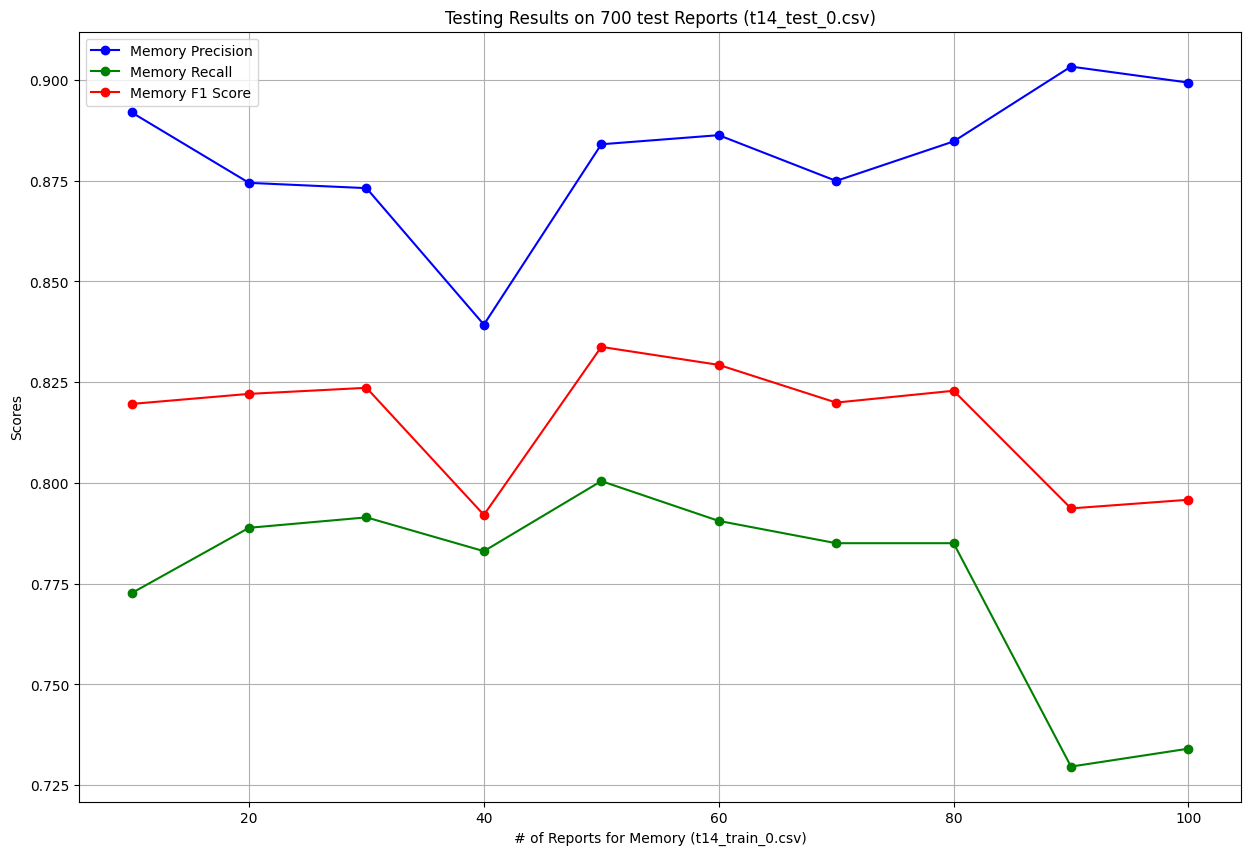

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.plot(x_idx, precision_lst, label='Memory Precision', color='blue', marker='o')
plt.plot(x_idx, recall_lst, label='Memory Recall', color='green', marker='o')
plt.plot(x_idx, f1_lst, label='Memory F1 Score', color='red', marker='o')

# plt.axhline(y=zs_precision, color='blue', linestyle='--', label='Zero-shot Precision')
# plt.axhline(y=zs_recall, color='green', linestyle='--', label='Zero-shot Recall')
# plt.axhline(y=zs_f1, color='red', linestyle='--', label='Zero-shot F1 Score')

# for i in range(len(memory_idx)):
#     if (precision_lst[i] < zs_precision) and (recall_lst[i] < zs_recall):
#         plt.annotate(f'{memory_idx[i]}', 
#                      (memory_idx[i], f1_lst[i]), 
#                      textcoords="offset points", 
#                      xytext=(0,10), 
#                      ha='center', 
#                      fontsize=10, 
#                      color='red')

plt.xlabel('# of Reports for Memory (t14_train_0.csv)')
plt.ylabel('Scores')
plt.title('Testing Results on 700 test Reports (t14_test_0.csv)')
plt.legend()
plt.grid(True)

plt.show()